# Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

### Instructions
1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
3. What should we do with the customer_id column?
4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
            numerical_df = customer_df.select_dtypes()
            categorical_df = customer_df.select_dtypes()
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## 2. Load the csv

In [2]:
customer_df = pd.read_csv("/Users/kt/Desktop/Ironhack/Data-Analytics-Ironhack/unit-4/lab-cleaning-numerical-data/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# standardize column name following PE8
customer_df.columns = [customer_df.columns[i].lower().replace(' ', '_') for i in range(len(customer_df.columns))] 

In [5]:
# check columns name
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 3. Drop the customer_id column

In [6]:
customer_df = customer_df.drop(['customer'], axis=1)
customer_df.head(3)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


# 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
            numerical_df = customer_df.select_dtypes()
            categorical_df = customer_df.select_dtypes()

In [7]:
numerical_df = customer_df.select_dtypes("number")
numerical_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247


In [8]:
categorical_df = customer_df.select_dtypes("object")
categorical_df.head(3)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


# 5. Plot every categorical variable

In [9]:
# check value_counts for each column in categorical_df

for column in categorical_df.columns:
    print("\n" + column)
    print(categorical_df[column].value_counts())


state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
No     7826
Yes    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25

In [10]:
# effective_to_date is not considered categorical, so I removed it 

categorical_df = categorical_df.drop(['effective_to_date'], axis=1)

In [11]:
# get data (target) to set as the y-axis
y = numerical_df[['total_claim_amount']]
y.head()

,total_claim_amount
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879


In [12]:
# check number of columns in categorical data frame to set up the plot layout >> 16 columns
categorical_df.shape

(9134, 14)

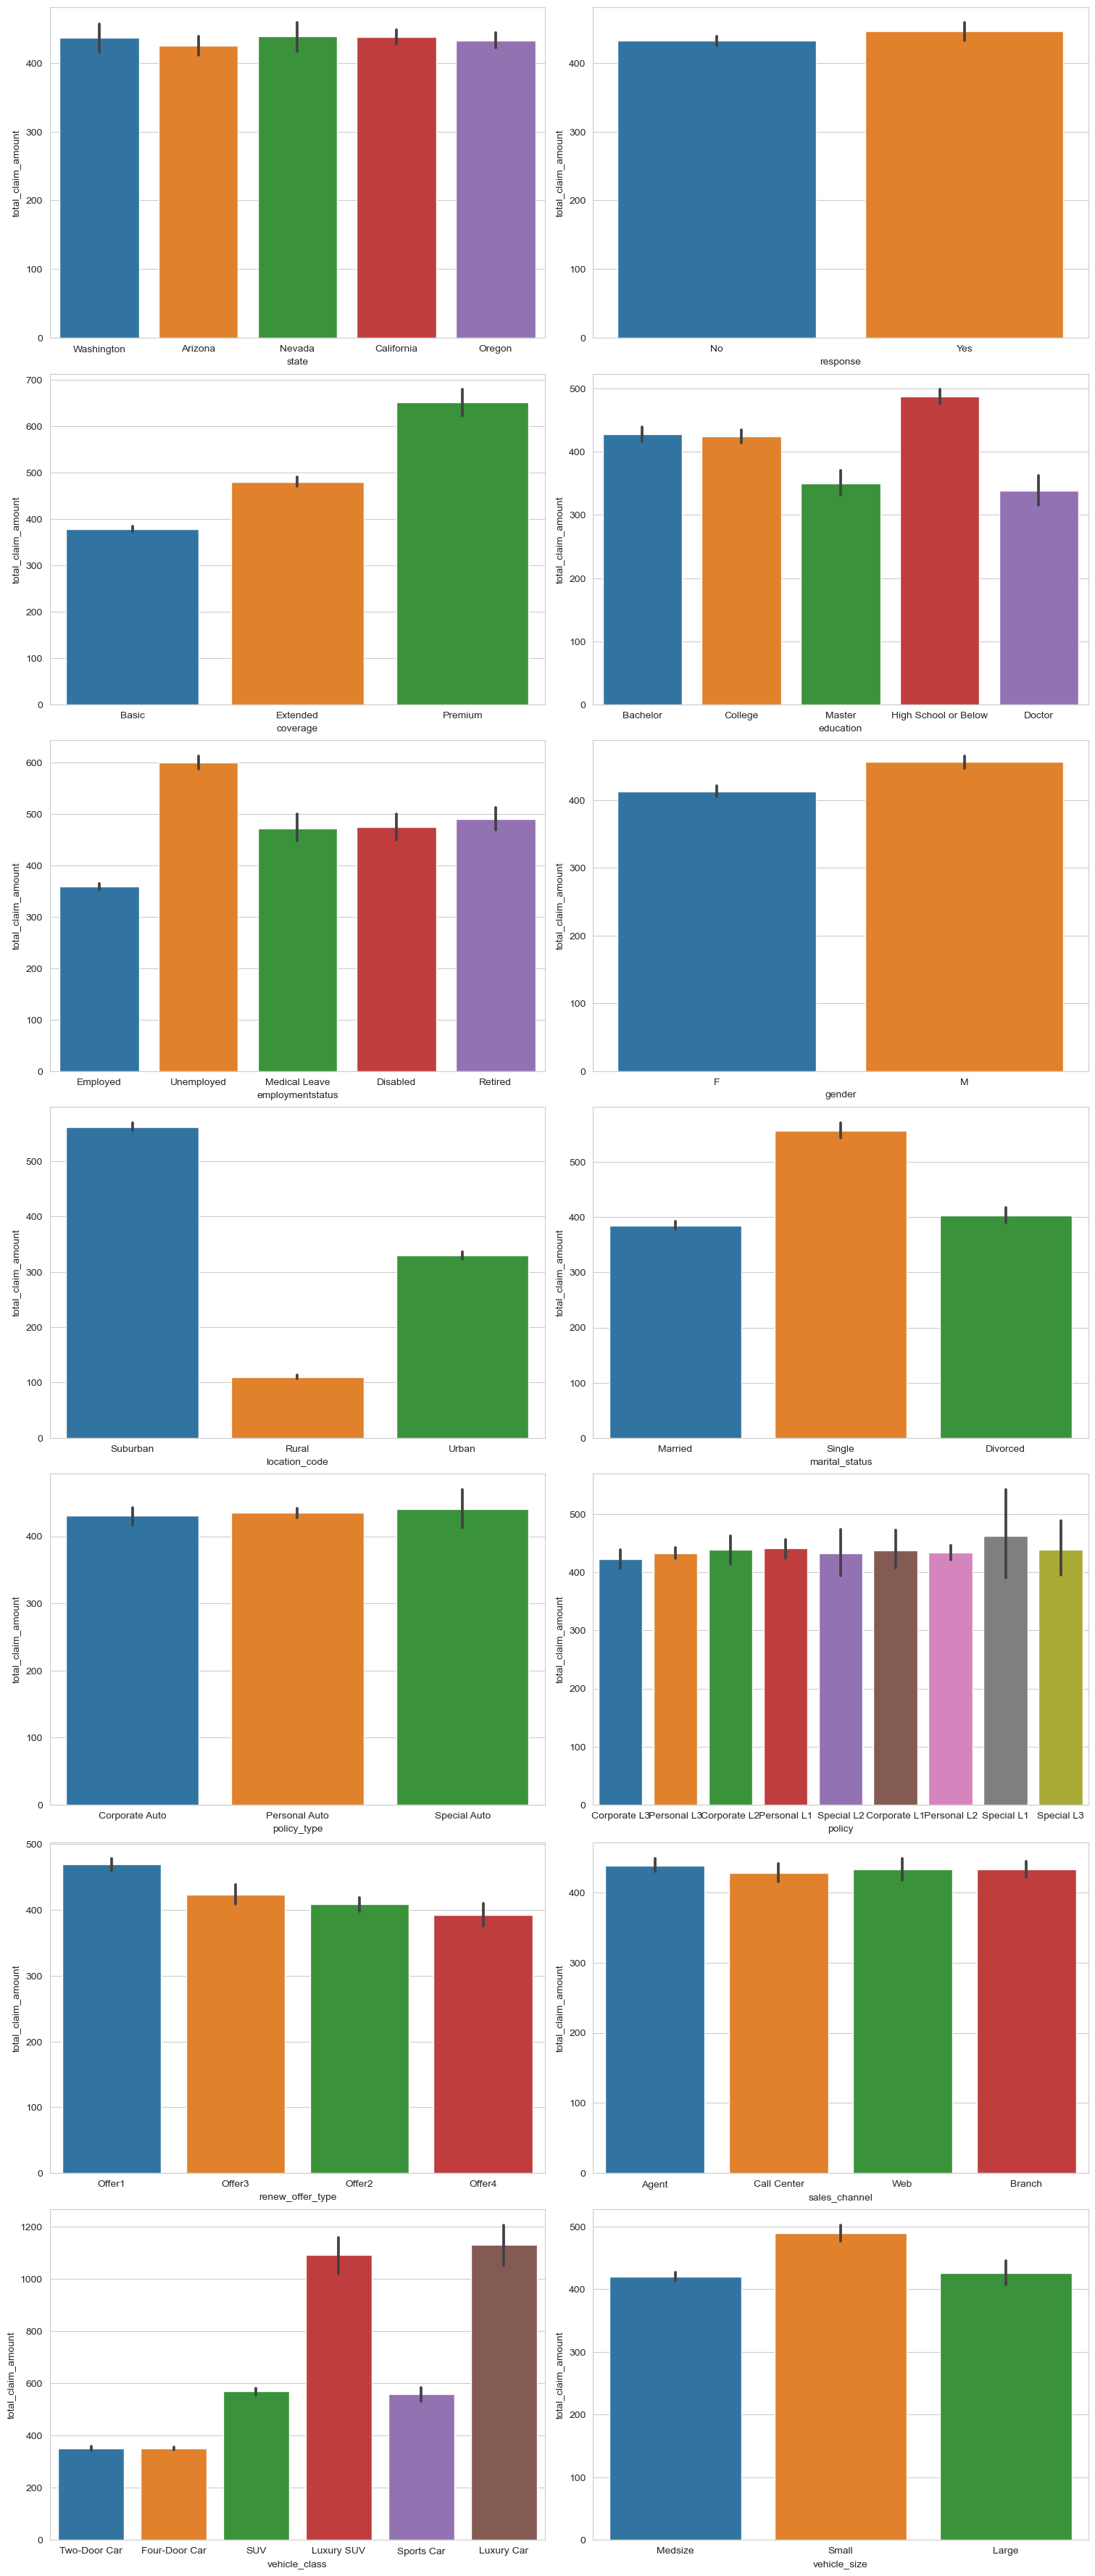

In [13]:
# bar plot for all categorical column >> set our target (total_claim_amount) as y-axis, unique category as x-axis

fig = plt.figure(figsize = (15, 40), constrained_layout = True)

for i, column in enumerate(categorical_df.columns):
    fig.add_subplot(8, 2, i + 1) # plot in 7 rows, 2 columns
    # categorical_df[column].value_counts().plot(kind="bar", title=column, rot=0) 
    sns.barplot(x=categorical_df[column], y="total_claim_amount", data=customer_df)

# 6. For the categorical data, check if there is any data cleaning that need to perform

In [14]:
def explore_data(data): # # sum & returns duplicates, NaN & empty spaces
    """
    This function find Null, empty string, and duplicated rows, first written by Isi. Thanks!
    """
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows)
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(categorical_df)

 Found 340 duplicated rows.


,NaN,EmptySpaces
state,0,0
response,0,0
coverage,0,0
education,0,0
employmentstatus,0,0
gender,0,0
location_code,0,0
marital_status,0,0
policy_type,0,0
policy,0,0


- From data above, we found 340 duplicated data in 'categorical_df'


- If we decide to drop them, it'll generate unequal rows to the numerical data


- Also we don't know if they are truely duplicated data (for the whole dataset) because numerical columns were separated


- My opinion is, first, checking for the whole data (including numerical+categorical) for the duplicated rows before doing the drop



In [15]:
# calling the function above to check the whole data frame (customer_df) for duplicated, NaN & Empty string

explore_data(customer_df)

 Found 163 duplicated rows.


,NaN,EmptySpaces
state,0,0
customer_lifetime_value,0,0
response,0,0
coverage,0,0
education,0,0
effective_to_date,0,0
employmentstatus,0,0
gender,0,0
income,0,0
location_code,0,0


#### Answer question 6

   - After checking the whole data frame. There are no duplicated rows.
    
   - Therefore, we do not drop those 340 rows we found duplicated in categorical_df
    
   - Also, we found no NaN and empty string but from the data (value_counts + graph above). The policy cound be grouping into Personal, Corporate, and Special to reduce cardinality
           - After checking some more, we found that in the data frame, there's 'policy_type' column which represents the policy category. As said above, we can reduce cardinality by grouping them. But here, it is already exist, so we can drop the column 'policy' for the last clean up for this dataset. Because the data are similar to the policy_type

In [16]:
categorical_df[["policy_type", "policy"]]

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3
2,Personal Auto,Personal L3
3,Corporate Auto,Corporate L2
4,Personal Auto,Personal L1
...,...,...
9129,Personal Auto,Personal L1
9130,Corporate Auto,Corporate L3
9131,Corporate Auto,Corporate L2
9132,Personal Auto,Personal L2


In [17]:
categorical_df = categorical_df.drop(['policy'], axis=1)
categorical_df.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize


In [18]:
# Lab ended & thanks for checking :)